## 我们主要是展示一下，如何用deep learning 去更好地做图片识别（分类）
---
### 今天我们要用到的是经典dataset [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.
### 这是一个手写字体的图片集，label 标的是0到9的阿拉伯数字！

步骤如下：

>1. 我们先load数据并看看它是怎么样的
2. 然后我们开始搭网络了
3. 训练
4. 评估是实际地预测我们的data


### 首先我们来看看我们要用的库

In [47]:
import keras # main
from keras.datasets import mnist ## 我们通过这个来import mnist dataset
import numpy as np # 

import matplotlib.pyplot as plt# 画图 
%matplotlib inline

### 开始正式干活! 我们先load data

In [72]:
(X,y),(X_test,y_test) = mnist.load_data()


### 下载好了我们来看看什么是tensor

In [49]:
X[0].shape # 这代表的是training data 第一个数据的 X 的形状！，28pixels * 28pixels

(28, 28)

In [50]:
y_train[0] # 对应的label就是 5，这张图片就是一张手写的 5 图片！

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
print("The MNIST database has a training set of %d examples." % len(X))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 我们把处理好的tensor data，放到我们的dataloader工具里面，这样我们在run model 的时候，数据就能一批批地送给model去学习了。

In [52]:
from sklearn.model_selection import train_test_split
valid_size = .2


X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = valid_size,random_state = 224)

In [53]:
y_train[0]

0

### 也许这么讲还会是比较抽象，我一开始也是这样不懂，所以我们来把数字好好打印出来看看，就明白了

20
(20, 28, 28)
(20, 28, 28)


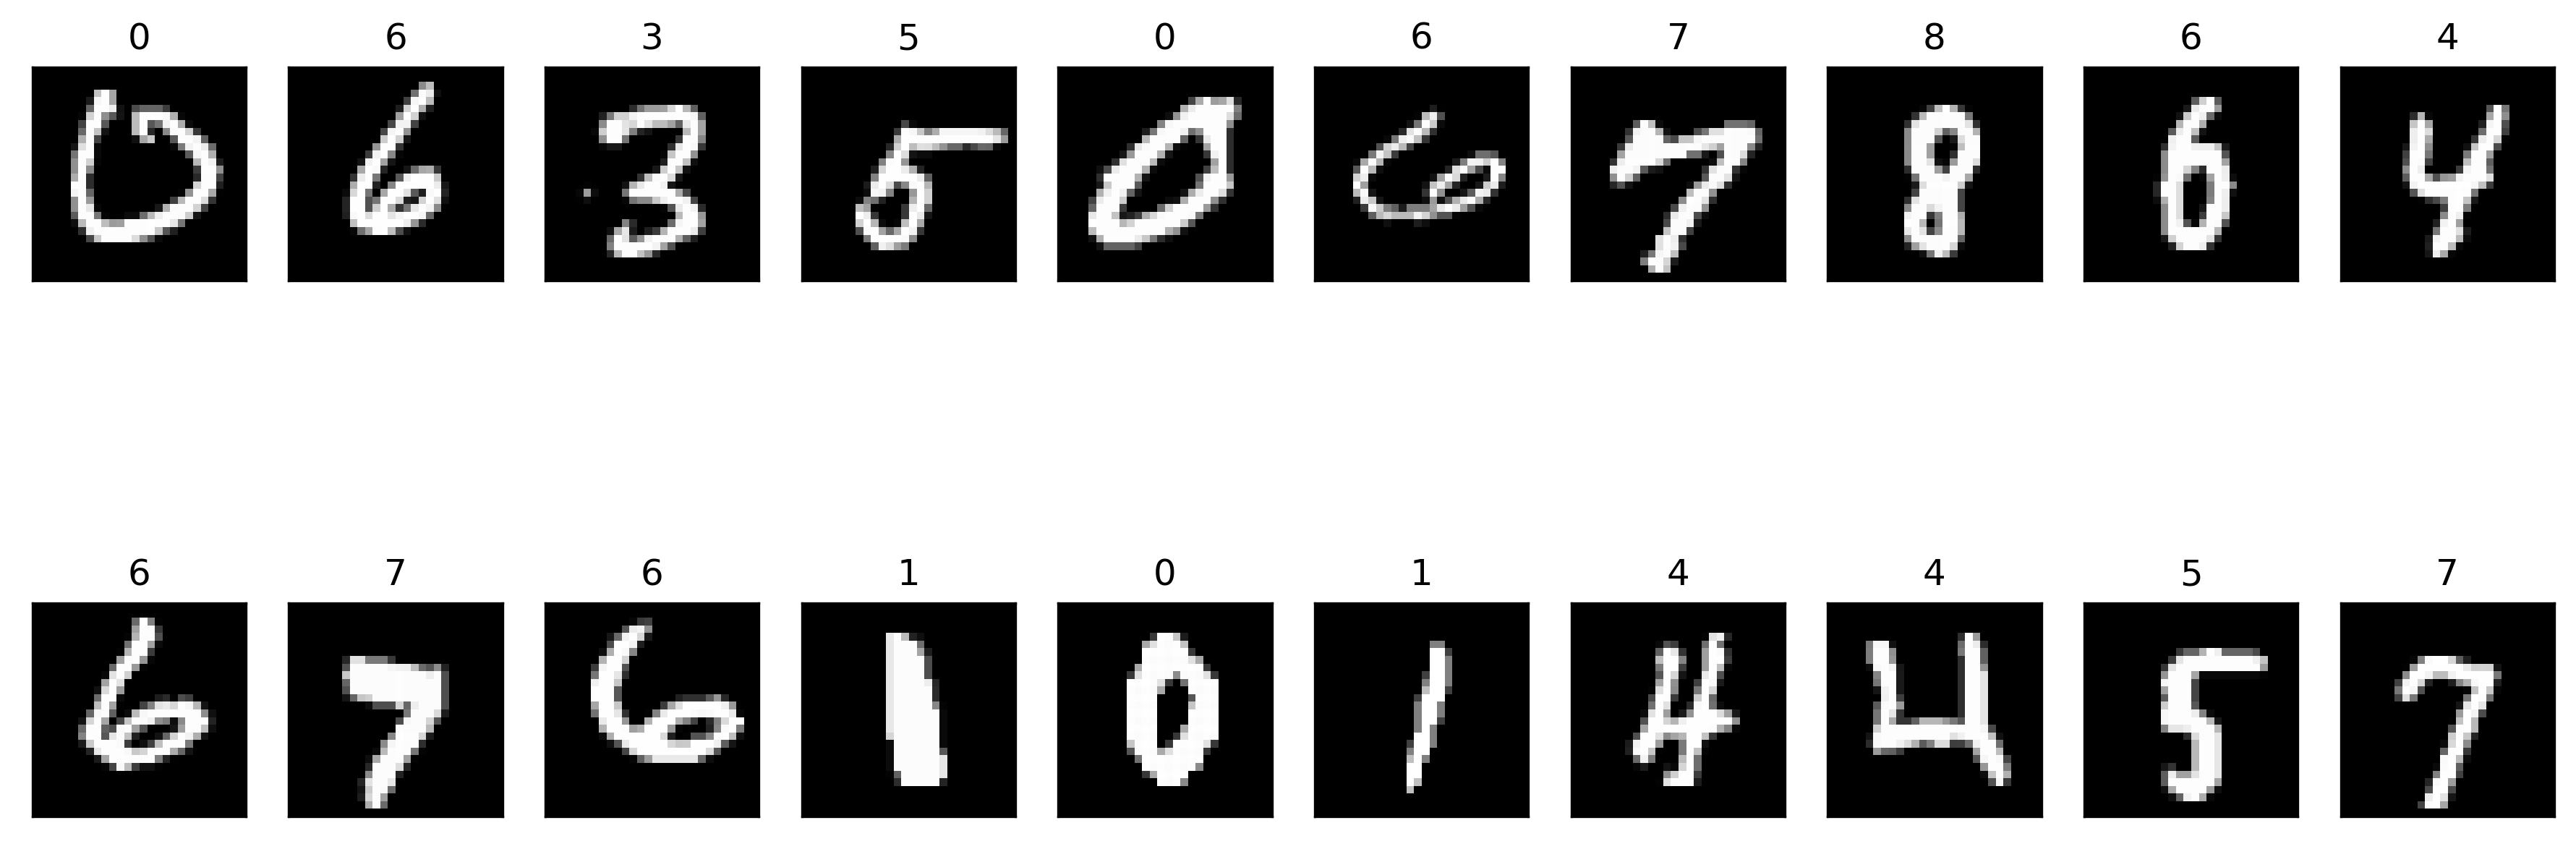

In [54]:
pixels = X_train[:20]
labels = y_train[:20]

print(len(pixels))
print(pixels.shape) # 这是我们可以看到 数据的维度还是原来的 20，1，28，28 这是个4维的
print(np.squeeze(pixels).shape) # sequeeze 就会减去中中间1的那个维度


#基本配置好了以后我们就开始作图了。
fig = plt.figure(figsize=(15,6),dpi=300) # 定义一下画布

for i in range(20): #我们作20张图,这里是一个batch的量 20张
    ax = fig.add_subplot(2,#两行
                         20/2,# 每行那就是 10个图片了
                         i+1,
                         xticks=[],
                         yticks=[] # 横纵坐标都抹去，毕竟我们要的就是图片本身
    )
    ax.imshow(pixels[i], # imshow 就是image show 出来！
              cmap='gray')
    ax.set_title(str(labels[i]))# 这里label还是tensor的属性，所以我们要用item 这个method 读数字出来
                    
# 对的，我们的图片第一张是4,不是上面的5️⃣，我们打乱了

### 我们在单看一张图片，再细细研究

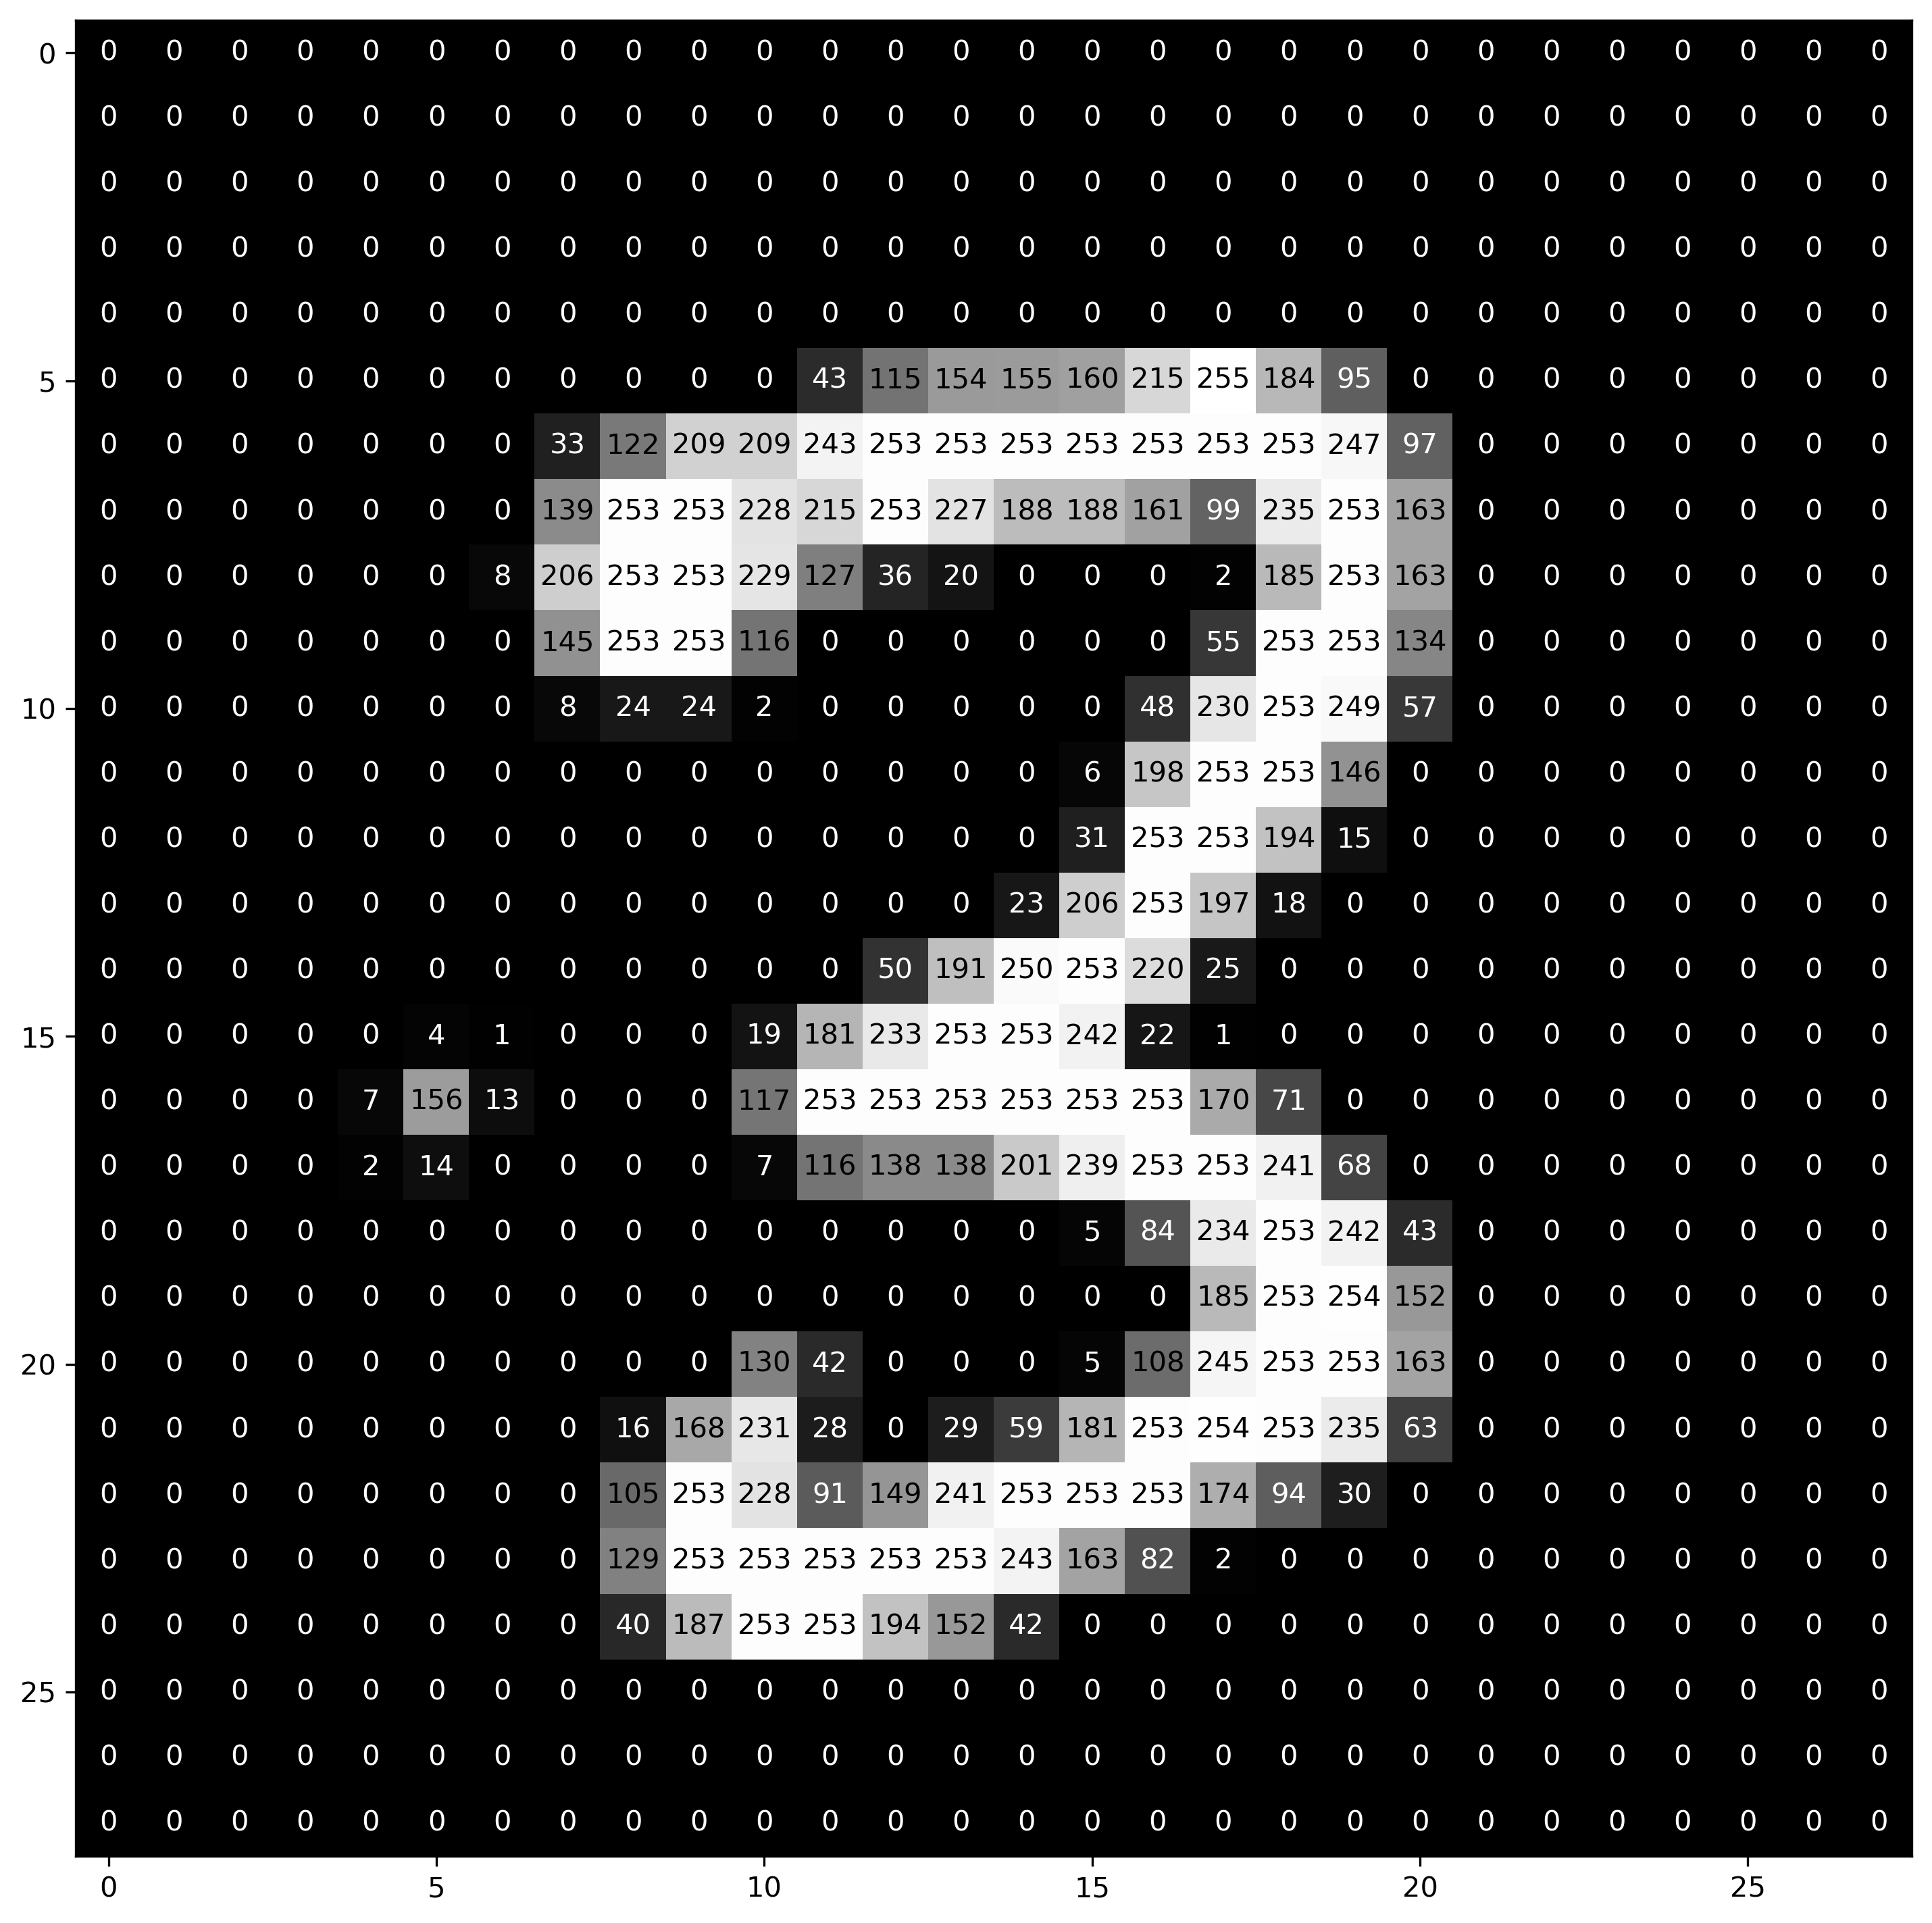

In [55]:
img = pixels[2] # 我们打印第三张，4 ！

fig = plt.figure(figsize = (12,12),dpi=300) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5

#下面的操作就是 打印上一些备注，我们展示出代表出阿拉伯图像的数字，分别是什么？
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0 # 取两位小数
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')


### 希望通过上面，可以明白，计算机是怎么显示图片的。我们理解了这个以后就可以反过来然他来学习了
## MLP

In [56]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255 

## Catogorize the labels

In [57]:
##
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_valid[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_valid = np_utils.to_categorical(y_valid, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_valid[:10])

Integer-valued labels:
[8 0 3 0 7 0 8 7 4 3]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


In [59]:
#Python 3.7 is not keras!!!

# Keras requires the input shape to be specified in the first layer, 
#but it will automatically infer the shape of all other layers. 
#This means you only have to explicitly set the input dimensions for the first layer.
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train.shape[1:]))
mlp.add(Dense(500,activation='relu'))

##e.g., model.add(Dense(128)); model.add(Activation('softmax')) is computationally equivalent to 
##      model.add(Dense(128, activation="softmax")))


#mlp.add(Dropout(0.2))
mlp.add(Dense(512, activation='relu'))
#mlp.add(Dropout(0.2))
mlp.add(Dense(10, activation='softmax'))

mlp.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               256512    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 654,142
Trainable params: 654,142
Non-trainable params: 0
_________________________________________________________________


In [60]:
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [61]:
# evaluate test accuracy before train
score = mlp.evaluate(X_valid, y_valid, verbose=0,batch_size=60)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 6.4833%


## WE train model

In [66]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)

hist = mlp.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, # there is no need for valid data, without cross-validation we cannot 
                 callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 38400 samples, validate on 9600 samples
Epoch 1/10
38400/38400 [==============================] - 6s 156us/step - loss: 0.0071 - acc: 0.9979 - val_loss: 0.0081 - val_acc: 0.9977

Epoch 00001: val_loss improved from inf to 0.00812, saving model to mnist.model.best.hdf5
Epoch 2/10
38400/38400 [==============================] - 5s 120us/step - loss: 0.0073 - acc: 0.9980 - val_loss: 0.0099 - val_acc: 0.9978

Epoch 00002: val_loss did not improve from 0.00812
Epoch 3/10
38400/38400 [==============================] - 5s 119us/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0102 - val_acc: 0.9975

Epoch 00003: val_loss did not improve from 0.00812
Epoch 4/10
38400/38400 [==============================] - 5s 136us/step - loss: 0.0052 - acc: 0.9986 - val_loss: 0.0203 - val_acc: 0.9956

Epoch 00004: val_loss did not improve from 0.00812
Epoch 5/10
38400/38400 [==============================] - 4s 110us/step - loss: 0.0054 - acc: 0.9988 - val_loss: 0.0267 - val_acc: 0.9943

Epoch 00005: 

In [71]:
# load the weights that yielded the best validation accuracy
mlp.load_weights('mnist.model.best.hdf5')

In [73]:
X_test = X_test.astype('float32')/255
y_test = np_utils.to_categorical(y_test, 10)

# evaluate test accuracy
score = mlp.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.1400%


In [74]:
X_train.shape

(48000, 28, 28)


### 接下来我们来看看怎么用keras去搭建CNN model 

In [79]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
cnn = Sequential()
cnn.add(Conv2D(filters = 16,#如果是彩色，那三通道，这里就会是3，我们黑白图片就会是选1
               kernel_size = 3,# 卷积的大小，3*3的矩阵
               padding = 'same',# 如果想要 con2d 出来的图片长宽没有变化, padding=(kernel_size-1)/2 当 stride=1
               activation = 'relu',
              input_shape = (28,28,1) #如果是彩色，那三通道，这里就会是3，我们黑白图片就会是选1
              ))
cnn.add(MaxPooling2D(pool_size = 2))# 这里的2，2 分别是 kernel size 为2，然后步长为2. 这样的卷积，每次取经过的最大一个
        # 原来 28* 28 的图片，经过它以后，将 变为 14* 14 数据量变成原来的4份1.
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

cnn.add(Flatten()) # 32 * 7 * 7

cnn.add(Dense(500, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.summary() #看看我们的model    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 500)               1568500   
__________

In [80]:
cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])#这里用sgd 这个优化器，改变我们的parameter 就是我们说的学习方式


### 原来我们花了那么多时间，现在总算是要去训练了

In [95]:
T = np.expand_dims(X_train, axis=3)
T.shape

(48000, 28, 28, 1)

In [96]:
EPOCH = 50 # 这个参数的意思是，我们要完完整整地loop多少次whole data set

from keras.callbacks import ModelCheckpoint   



X_train = np.expand_dims(X_train, axis=3)
X_valid = np.expand_dims(X_valid, axis=3)
X_test = np.expand_dims(X_test, axis=3)
# train the model
checkpointer = ModelCheckpoint(filepath='cnn.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = cnn.fit(X_train,y_train,epochs=EPOCH,batch_size=128,validation_data=(X_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 61s - loss: 0.2072 - acc: 0.9338 - val_loss: 0.0720 - val_acc: 0.9773

Epoch 00001: val_loss improved from inf to 0.07200, saving model to cnn.weights.best.hdf5
Epoch 2/50
 - 56s - loss: 0.0606 - acc: 0.9815 - val_loss: 0.0492 - val_acc: 0.9859

Epoch 00002: val_loss improved from 0.07200 to 0.04923, saving model to cnn.weights.best.hdf5
Epoch 3/50
 - 57s - loss: 0.0454 - acc: 0.9874 - val_loss: 0.0505 - val_acc: 0.9856

Epoch 00003: val_loss did not improve from 0.04923
Epoch 4/50
 - 57s - loss: 0.0392 - acc: 0.9889 - val_loss: 0.0580 - val_acc: 0.9865

Epoch 00004: val_loss did not improve from 0.04923
Epoch 5/50
 - 56s - loss: 0.0403 - acc: 0.9901 - val_loss: 0.1125 - val_acc: 0.9818

Epoch 00005: val_loss did not improve from 0.04923
Epoch 6/50
 - 51s - loss: 0.0448 - acc: 0.9915 - val_loss: 0.0817 - val_acc: 0.9882

Epoch 00006: val_loss did not improve from 0.04923
Epoch 7/50
 - 51s - loss: 0.0646 - acc: 0.9906 - val

KeyboardInterrupt: 

### 从新读取我们的model

In [97]:
cnn.load_weights('cnn.weights.best.hdf5')

In [98]:
# 我们来看看我们这个model 有什么惊人的成绩， 经过50次迭代以后 ！
# evaluate and print test accuracy
score = cnn.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.9874


### 最后可视化看看结果

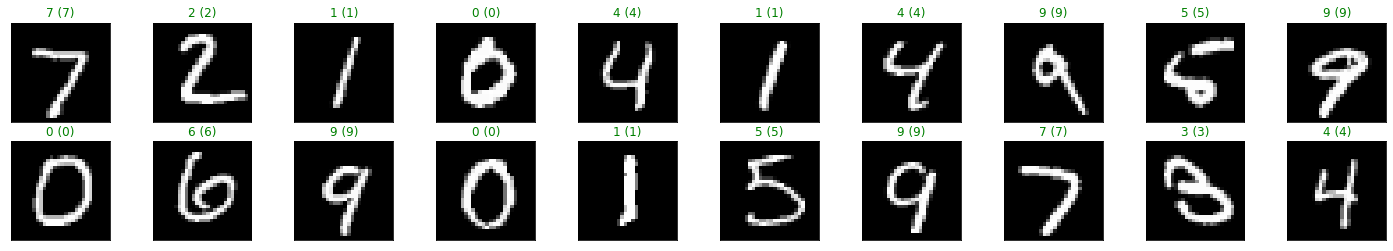

In [105]:
# get predictions on the test set
y_hat = cnn.predict(X_test)

# 变numpy 才能打印啊~
images = X_test[:20]
preds = np.argmax(y_hat[:20],axis=1)
truelabels = np.argmax(y_test[:20],axis=1)

# 将一整个batch 的来打印
fig = plt.figure(figsize=(25, 4))
for i in range(20):
    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[i]), str(truelabels[i])),
                 color=("green" if preds[i]==truelabels[i] else "red")) # 如果对了，就是绿字，如果错了就是红字！！！

### 全对✔️~